In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the model as a neural network
class CurveFit(nn.Module):
    def __init__(self):
        super(CurveFit, self).__init__()
        self.a = nn.Parameter( torch.tensor(1.0) )
        self.b = nn.Parameter( torch.tensor(1.0) )
        self.c = nn.Parameter( torch.tensor(1.0) )

    def forward(self, x):
        return self.a * torch.cos(2 * np.pi * self.b * x + self.c)

n = 1000
# Generate some noisy data
xdata = np.linspace(0, 2, n)
ydata = 0.6 * np.cos(2 * np.pi * 0.7 * xdata) + np.random.normal(0, 0.1, n)

# Convert the data to PyTorch tensors
xdata = torch.tensor(xdata, dtype=torch.float32).unsqueeze(1)
ydata = torch.tensor(ydata, dtype=torch.float32).unsqueeze(1)

# Define the model and optimizer
model = CurveFit()

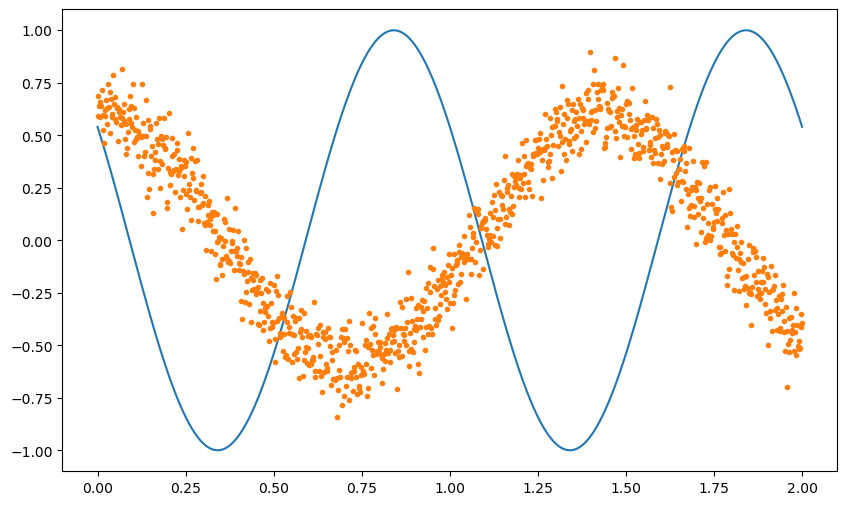

In [21]:
# plot model before training

# create figure
plt.figure(figsize=(10, 6))
plt.plot(xdata, model(xdata).detach().numpy())
plt.plot(xdata, ydata.detach().numpy(), '.')

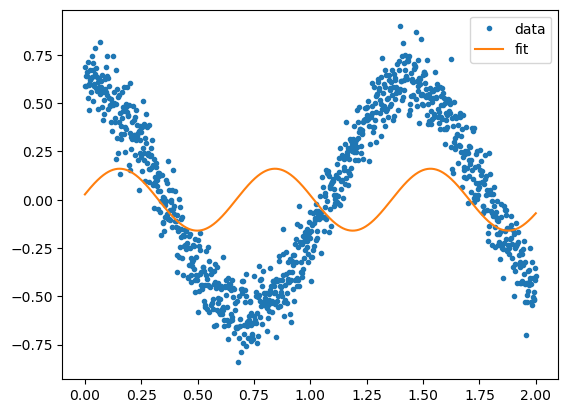

In [22]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

criterion = nn.SmoothL1Loss()

epochs = 1000

# Train the model
for epoch in range(epochs):
    optimizer.zero_grad()
    ypred = model(xdata)
    loss = criterion(ypred, ydata)
    loss.backward()
    optimizer.step()

# Generate predictions from the trained model
# xtest = torch.linspace(0, 1, 100).unsqueeze(1)
ytest = model(xdata).detach().numpy()

# Plot the results
plt.plot(xdata.numpy(), ydata.numpy(), '.', label='data')
plt.plot(xdata.numpy(), ytest, label='fit')
plt.legend()
plt.show()